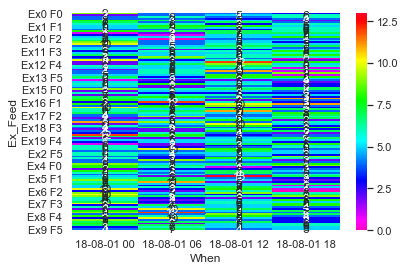

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from random import randint
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Some exchanges

exc=["Ex{}".format(n) for n in range(20)]
# A Feed
feed=['F{}'.format(n) for n in range(6)]
status=['Ok','Warning','Fail']

def good_bad_etc():
    global status
    v = randint(0,100)
    if v<90:
            return status[0]
    elif v<98:
            return status[1]
    else:
            return status[2]
        
def Simplify_date(date_time_obj): 
    return date_time_obj.strftime("%Y-%M-%D")

# Data Frame with GOOD Data Only in it
df_good=pd.DataFrame(columns=['Id','When','Exchange','Feed','Status'])

#
# Fake Some Data
#

# Set the ID
df_good.Id=[a for a in range(0,len(df_good))]
# Generate a Date/Time Value
df_good.When=pd.date_range(start="1-Aug-2018",end="2-Aug-2018",freq='1s')

id=[a for a in range(0,len(df_good))]
ex=[exc[randint(0,len(exc)-1)] for a in range(0,len(df_good))]
fd=[feed[randint(0,len(feed)-1)] for a in range(0,len(df_good))]
df_good.Id=id
df_good.Exchange=ex
df_good.Feed=fd
# Use a simple Function to skew the Dist of the Good-Bad etc
df_good.Status=df_good.Status.apply(lambda x: good_bad_etc())

df_good['Ex_Feed']=df_good.Exchange+" "+df_good.Feed

#
#  Remove all the OK's !!
#
df_good=df_good[df_good.Status!='Ok']



df_summary=df_good.groupby(by=['When','Ex_Feed','Status']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])
df_summary.index=pd.DatetimeIndex(df_summary.When)
#Remove the Col as we are using it as an index
df_summary.drop(columns=['When'],inplace=True)

df_grouped=df_summary.groupby(['Ex_Feed','Status']).resample('6h')['size'].sum()
#
#Now remove the index ...i.e. flatten the Output
df_grouped=df_grouped.reset_index()
#
# Only Process Failed Links
#
df_fail=(df_grouped[df_grouped.Status=='Fail']).drop(columns=['Status'])
df_tmp=df_fail
#
#
#df_fail.When=df_fail.When.apply(lambda x: Simplify_date(pd.to_datetime(x)))
df_fail_pvt=df_fail.pivot(index="Ex_Feed",columns="When",values="size")
sns.set()
#df_fail.reset_index(inplace=True)
#MUST get rid of nan values - else nasty crash will occur.
df_fail_pvt.fillna(0,inplace=True)

max_val_in_df=max(list(df_fail_pvt.max()))

#
# Reformat X Axis using  using the DataFrom prior to the pivot 
#

ax=sns.heatmap(df_fail_pvt,annot=True,
            vmin=0,
            vmax=max_val_in_df,
            cmap ='gist_rainbow_r')
ax.set_xticklabels(df_fail.When.dt.strftime("%y-%m-%d %H"))
plt.xticks(rotation= 0)
plt.show()

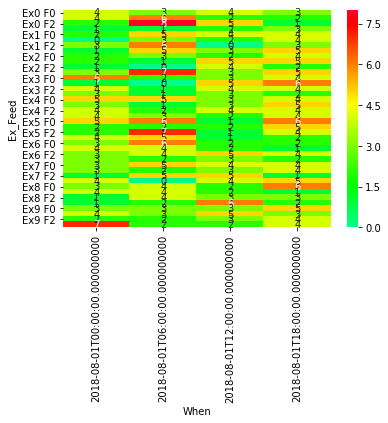

In [57]:

import numpy as np
t=df_tmp.pivot("Ex_Feed","When","size")
max_val_in_df=max(list(df_fail.max()))
#corr = np.corrcoef(0,int(max_val_in_df))

t.fillna(0,inplace=True)
sns.heatmap(t,annot=True,center=0,vmin=0,
            vmax=max_val_in_df,
            cmap ='gist_rainbow_r')

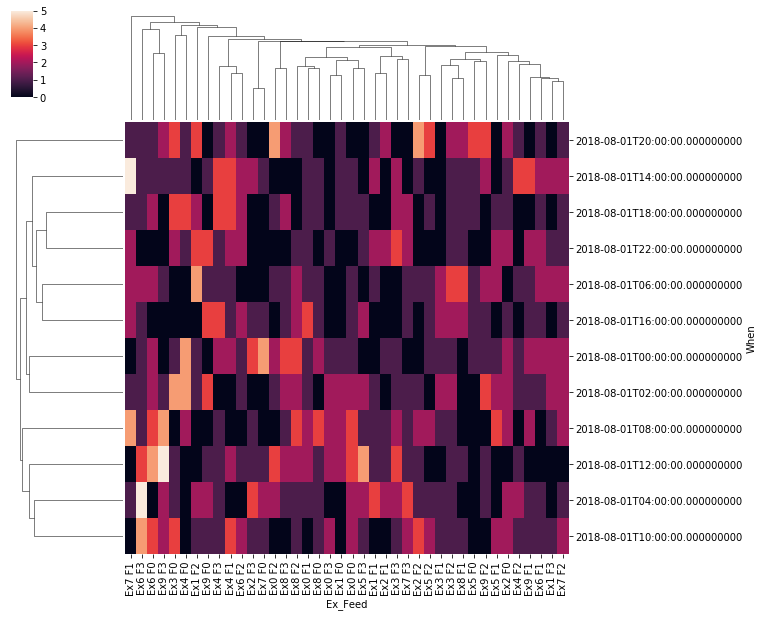

In [33]:
 sns.clustermap(df_fail)

In [44]:
max(list(df_fail.max()))

9.0

In [63]:
df_fail.columns

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 06:00:00',
               '2018-08-01 12:00:00', '2018-08-01 18:00:00'],
              dtype='datetime64[ns]', name='When', freq=None)